In [1]:
import pandas as pd 
import numpy as np 
# Lectura de los datos 2D 
data_2d = pd.read_csv("data_2d.csv") 
data_3d = pd.read_csv("data_3d.csv")
print("Datos 2D:") 
print(data_2d.head())
print("Datos 3D")
print(data_3d.head())

Datos 2D:
          x         y  label
0 -0.542815  0.498673      1
1  0.141489 -0.753147      1
2 -0.289300  0.825718      1
3 -1.213340 -0.214456      1
4  0.632968 -0.433370      1
Datos 3D
          x         y         z  label
0 -0.374414  0.283797  0.359075      1
1 -0.499690  0.237449 -0.934250      1
2 -0.101329 -0.567124 -0.403850      1
3 -0.638039  0.276813  0.276937      1
4 -0.345600  0.187791  0.130636      1


In [2]:
# Estudio estadistico de los datos 2D
print("Estudio estadistico de los datos 2D:")
print(data_2d.describe())
print("---------------------------------------------")
# Estudio estadistico de los datos 3D
print("Estudio estadistico de los datos 3D:")
print(data_3d.describe())

Estudio estadistico de los datos 2D:
                x           y      label
count  500.000000  500.000000  500.00000
mean    -0.021084   -0.018481    3.00000
std      2.709409    2.739144    1.41563
min     -4.583528   -4.136309    1.00000
25%     -2.881481   -2.852890    2.00000
50%      0.063694   -0.063037    3.00000
75%      2.794664    2.877321    4.00000
max      4.166031    4.479313    5.00000
---------------------------------------------
Estudio estadistico de los datos 3D:
                x           y           z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.007135    0.012954    1.210683    3.00000
std      2.767796    2.706724    1.549598    1.41563
min     -4.076058   -4.533494   -1.900689    1.00000
25%     -2.846464   -2.810216   -0.068054    2.00000
50%      0.025454    0.098319    0.415523    3.00000
75%      2.903804    2.814452    2.868339    4.00000
max      4.058567    4.185694    4.135517    5.00000


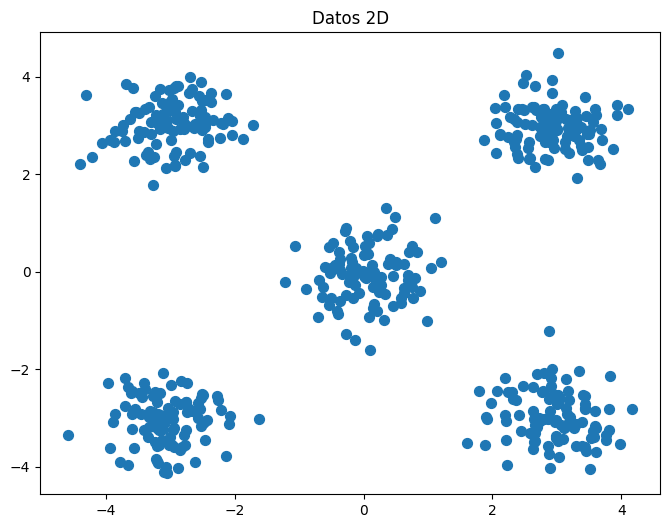

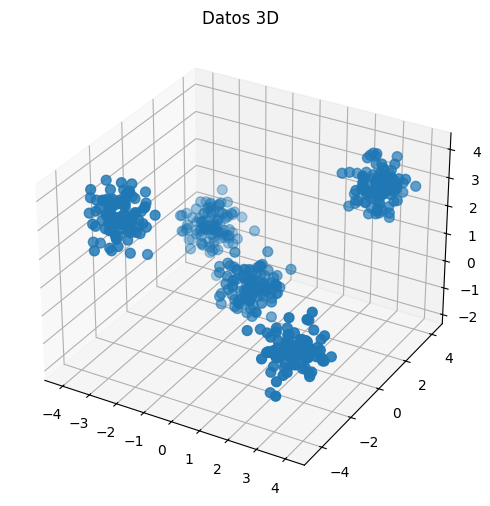

In [3]:
# importar libreria
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Gráfica de los datos 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d["x"], data_2d["y"], s=50)
plt.title("Datos 2D")
# Gráfica de los datos 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d["x"], data_3d["y"], data_3d["z"], s=50)
ax.set_title("Datos 3D")
plt.show()

In [4]:
# Fijar la semilla
np.random.seed(42)

In [5]:
import numpy as np  # Importamos NumPy para cálculos matemáticos y manejo de arreglos
import pandas as pd  # Importamos Pandas para manejar los datos
import matplotlib.pyplot as plt  # Importamos Matplotlib para graficar
from mpl_toolkits.mplot3d import Axes3D  # Importamos Axes3D para gráficos 3D

def distancia(p1, p2, metrica='euclidiana'):
    """Calcula la distancia entre dos puntos según la métrica elegida."""
    if metrica == 'euclidiana':  # Distancia Euclidiana (norma L2)
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':  # Distancia Manhattan (norma L1)
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':  # Distancia Chebyshev (máxima diferencia en cualquier dimensión)
        return np.max(np.abs(p1 - p2))
    else:
        raise ValueError("Métrica no soportada")  # Manejo de error si la métrica no es válida

def inicializar_centroides(puntos, k):
    """Inicializa k centroides de manera aleatoria dentro del dataset."""
    np.random.seed(42)  # Fijar semilla para reproducibilidad
    indices = np.random.choice(len(puntos), k, replace=False)  # Elegimos k índices aleatorios sin repetición
    return puntos[indices]  # Retornamos los puntos seleccionados como centroides iniciales

def asignar_a_centroides(puntos, centroides, metrica='euclidiana'):
    """Asigna cada punto al centroide más cercano según la métrica seleccionada."""
    asignaciones = np.zeros(len(puntos), dtype=int)  # Array para almacenar asignaciones
    for i, punto in enumerate(puntos):
        distancias = [distancia(punto, centroide, metrica) for centroide in centroides]  # Distancias a los centroides
        asignaciones[i] = np.argmin(distancias)  # Asigna el índice del centroide más cercano
    return asignaciones  # Devolvemos un array con los índices de los centroides más cercanos

def actualizar_centroides(puntos, asignaciones, k):
    """Recalcula los centroides como la media de los puntos asignados a cada uno."""
    dimensiones = puntos.shape[1]  # Número de dimensiones (2D o 3D)
    nuevos_centroides = np.zeros((k, dimensiones))  # Inicializamos el array de centroides
    for i in range(k):  # Iteramos sobre cada cluster
        cluster_puntos = puntos[asignaciones == i]  # Filtramos los puntos asignados al cluster i
        if len(cluster_puntos) > 0:
            nuevos_centroides[i] = cluster_puntos.mean(axis=0)  # Calculamos el nuevo centroide como el promedio
        else:
            nuevos_centroides[i] = puntos[np.random.randint(len(puntos))]  # Si no hay puntos, elegimos un punto aleatorio
    return nuevos_centroides  # Retornamos los nuevos centroides

def kmeans(puntos, k, max_iter=100, metrica='euclidiana'):
    """Implementación del algoritmo K-Means."""
    centroides = inicializar_centroides(puntos, k)  # Inicializamos los centroides aleatoriamente
    for _ in range(max_iter):  # Número máximo de iteraciones
        asignaciones = asignar_a_centroides(puntos, centroides, metrica)  # Asignamos puntos a los centroides
        nuevos_centroides = actualizar_centroides(puntos, asignaciones, k)  # Calculamos los nuevos centroides
        if np.allclose(centroides, nuevos_centroides):  # Si no cambian, terminamos
            break
        centroides = nuevos_centroides  # Actualizamos los centroides

    return asignaciones, centroides  # Retornamos las asignaciones y los centroides finales


# Cargar datos 2D y 3D asegurando que solo tomamos las dimensiones correctas
data_2d = pd.read_csv("data_2d.csv", usecols=[0, 1]).values  # Solo las primeras 2 columnas
data_3d = pd.read_csv("data_3d.csv", usecols=[0, 1, 2]).values  # Solo las primeras 3 columnas

# Ejecutar K-Means en datos 2D y 3D
k = 5  # Número de clusters
asignaciones_2d, centroides_2d = kmeans(data_2d, k)
asignaciones_3d, centroides_3d = kmeans(data_3d, k)

# Mostrar resultados sin columnas extra
print("==============================================")
print("Los centroides en 2D son:\n", centroides_2d)
print("Los centroides en 3D son:\n", centroides_3d)


Los centroides en 2D son:
 [[ 2.93696261 -2.97924176]
 [-3.01578394 -0.00669935]
 [ 0.0654345  -0.06164774]
 [ 3.4380238   2.8432112 ]
 [ 2.62172122  3.03158252]]
Los centroides en 3D son:
 [[ 3.03282978 -3.49574741 -0.02028615]
 [-2.04086586  0.00969758  0.99764896]
 [ 3.04422371 -2.67840194  0.07409187]
 [ 2.9102474   3.16839666  2.71074531]
 [ 3.15058187  2.85247987  3.4477961 ]]


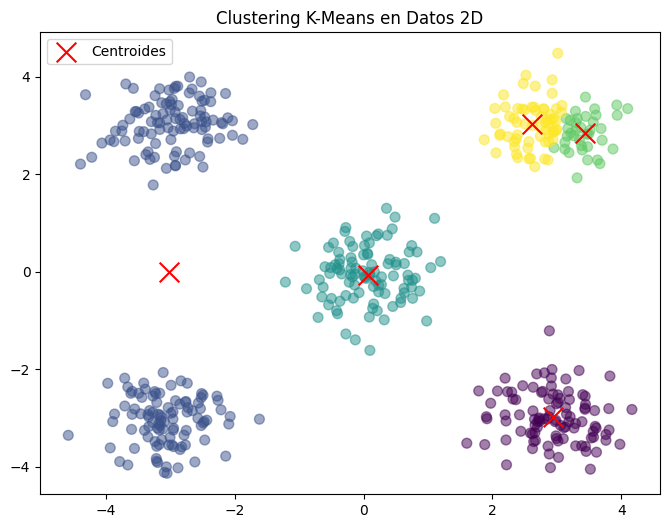

In [6]:
# Graficar resultados 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=asignaciones_2d, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroides_2d[:, 0], centroides_2d[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.title("Clustering K-Means en Datos 2D")
plt.legend()
plt.show()


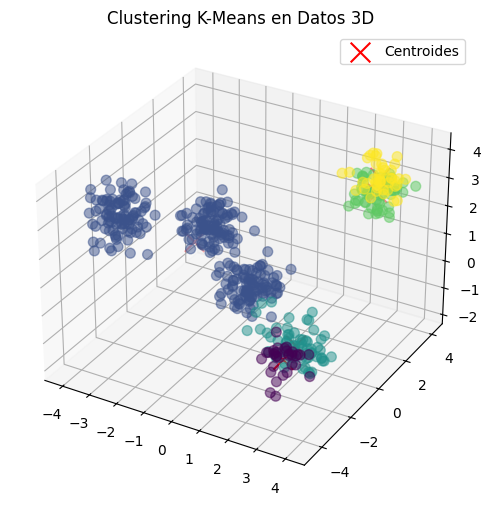

In [7]:
# Graficar resultados 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=asignaciones_3d, cmap='viridis', s=50, alpha=0.5)
ax.scatter(centroides_3d[:, 0], centroides_3d[:, 1], centroides_3d[:, 2], c='red', marker='x', s=200, label='Centroides')
ax.set_title("Clustering K-Means en Datos 3D")
plt.legend()
plt.show()

In [8]:
def calcular_inercia(puntos, asignaciones, centroides, q=2):
    """Calcula la inercia del clustering K-Means.
    
    Parámetros:
    - puntos: array con los datos originales.
    - asignaciones: array con los índices de los centroides asignados a cada punto.
    - centroides: array con las coordenadas de los centroides.
    - q: métrica de distancia, por defecto es la euclidiana (q=2).
    
    Retorna:
    - Inercia total del clustering.
    """
    inercia = 0
    for i in range(len(centroides)):  # Para cada cluster
        cluster_puntos = puntos[asignaciones == i]  # Puntos asignados al cluster i
        if len(cluster_puntos) > 0:
            distancias = np.sum(np.abs(cluster_puntos - centroides[i])**q, axis=1)  # ||x - μ_i||_q^q
            inercia += np.sum(distancias)  # Sumar distancias al total
    return inercia

# Calcular inercia para los datos 2D y 3D
inercia_2d = calcular_inercia(data_2d, asignaciones_2d, centroides_2d)
inercia_3d = calcular_inercia(data_3d, asignaciones_3d, centroides_3d)

print(f"Inercia en datos 2D: {inercia_2d}")
print(f"Inercia en datos 3D: {inercia_3d}")

Inercia en datos 2D: 2089.0129057743297
Inercia en datos 3D: 3269.486357429525


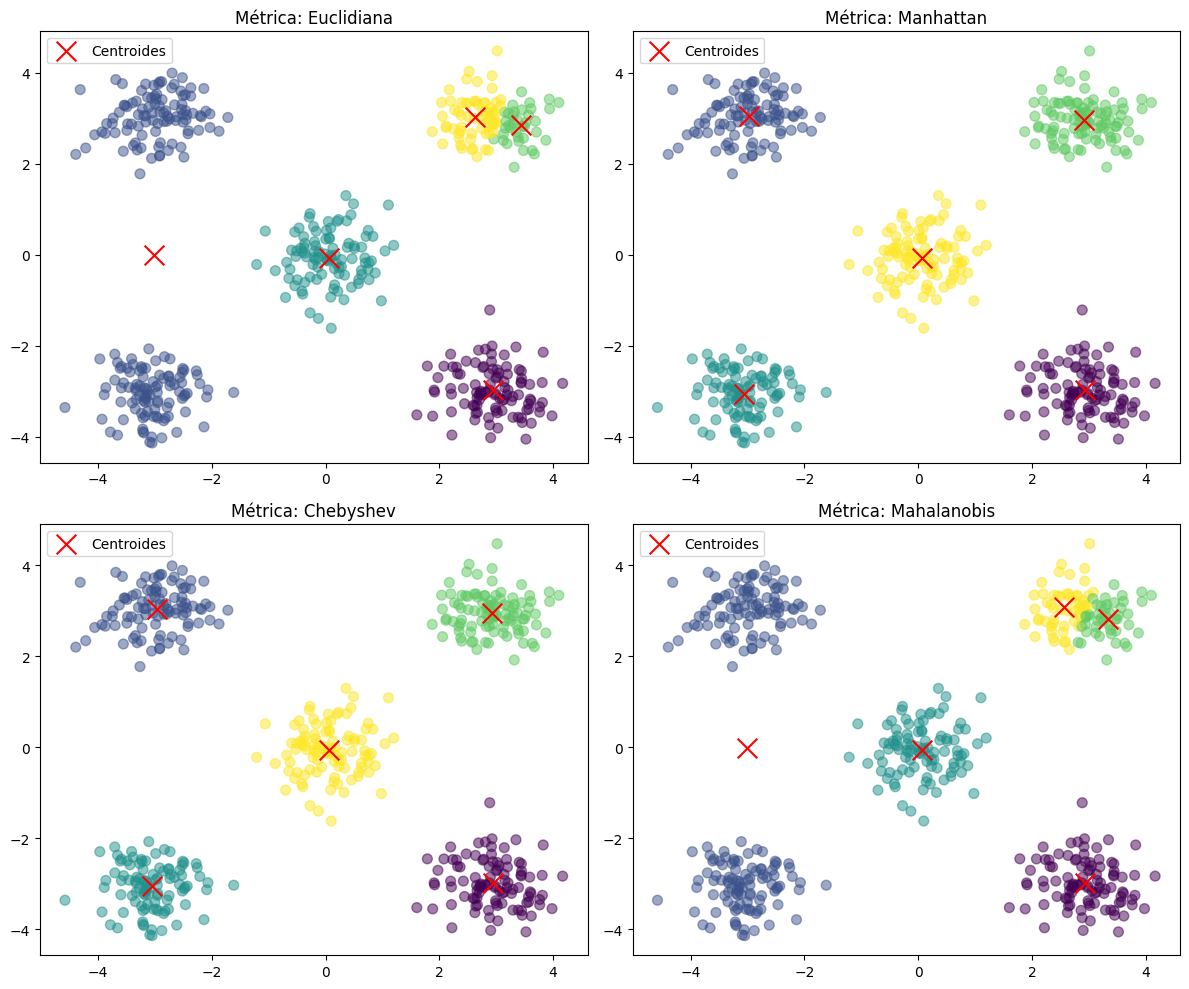

Centroides con métrica euclidiana:
[[ 2.936963 -2.979242]
 [-3.015784 -0.006699]
 [ 0.065435 -0.061648]
 [ 3.438024  2.843211]
 [ 2.621721  3.031583]]

Centroides con métrica manhattan:
[[ 2.936963 -2.979242]
 [-2.972411  3.040485]
 [-3.059157 -3.053884]
 [ 2.923753  2.961885]
 [ 0.065435 -0.061648]]

Centroides con métrica chebyshev:
[[ 2.936963 -2.979242]
 [-2.972411  3.040485]
 [-3.059157 -3.053884]
 [ 2.923753  2.961885]
 [ 0.065435 -0.061648]]

Centroides con métrica mahalanobis:
[[ 2.936963 -2.979242]
 [-3.015784 -0.006699]
 [ 0.065435 -0.061648]
 [ 3.34045   2.826373]
 [ 2.568789  3.077321]]



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# Función para calcular la distancia según la métrica seleccionada
def calcular_distancia(p1, p2, metrica='euclidiana', A_inv=None):
    if metrica == 'euclidiana':
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':
        return np.max(np.abs(p1 - p2))
    elif metrica == 'mahalanobis':
        if A_inv is None:
            raise ValueError("Se necesita la matriz inversa de covarianza para Mahalanobis.")
        return mahalanobis(p1, p2, A_inv)
    else:
        raise ValueError("Métrica no soportada")

# Función para asignar puntos a los centroides
def asignar_a_centroides(puntos, centroides, metrica='euclidiana', A_inv=None):
    asignaciones = []
    for punto in puntos:
        distancias = [calcular_distancia(punto, centroide, metrica, A_inv) for centroide in centroides]
        asignaciones.append(np.argmin(distancias))
    return np.array(asignaciones)

# Función para ejecutar K-Means con diferentes métricas
def kmeans_experimento(puntos, k, metrica='euclidiana', max_iter=100):
    np.random.seed(42)
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    A_inv = None
    
    if metrica == 'mahalanobis':
        cov_matrix = np.cov(puntos.T)  # Matriz de covarianza
        A_inv = np.linalg.inv(cov_matrix)  # Matriz inversa para Mahalanobis
    
    for _ in range(max_iter):
        asignaciones = asignar_a_centroides(puntos, centroides, metrica, A_inv)
        nuevos_centroides = np.array([
    puntos[asignaciones == i, :3].mean(axis=0) if len(puntos[asignaciones == i]) > 0 
    else puntos[np.random.randint(len(puntos)), :3] 
    for i in range(k)])
        if np.allclose(centroides, nuevos_centroides):
            break
        centroides = nuevos_centroides
    
    return asignaciones, centroides

# Cargar datos 2D
data_2d = pd.read_csv("data_2d.csv", usecols=[0, 1]).values  # Solo las primeras 2 columnas
k = 5
metricas = ['euclidiana', 'manhattan', 'chebyshev', 'mahalanobis']

# Graficar los resultados para cada métrica
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, metrica in enumerate(metricas):
    asignaciones, centroides = kmeans_experimento(data_2d, k, metrica)
    axes[i].scatter(data_2d[:, 0], data_2d[:, 1], c=asignaciones, cmap='viridis', s=50, alpha=0.5)
    axes[i].scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200, label='Centroides')
    axes[i].set_title(f"Métrica: {metrica.capitalize()}")
    axes[i].legend()

plt.tight_layout()
plt.show()

# Diccionario para almacenar los centroides de cada métrica
centroides_resultados = {}

# Ejecutar K-Means y guardar los centroides
for metrica in metricas:
    _, centroides = kmeans_experimento(data_2d, k, metrica)
    centroides_resultados[metrica] = centroides

# Imprimir los centroides correctamente
for metrica, centroides in centroides_resultados.items():
    print(f"Centroides con métrica {metrica}:")
    print(np.array2string(centroides, precision=6, suppress_small=True))
    print()


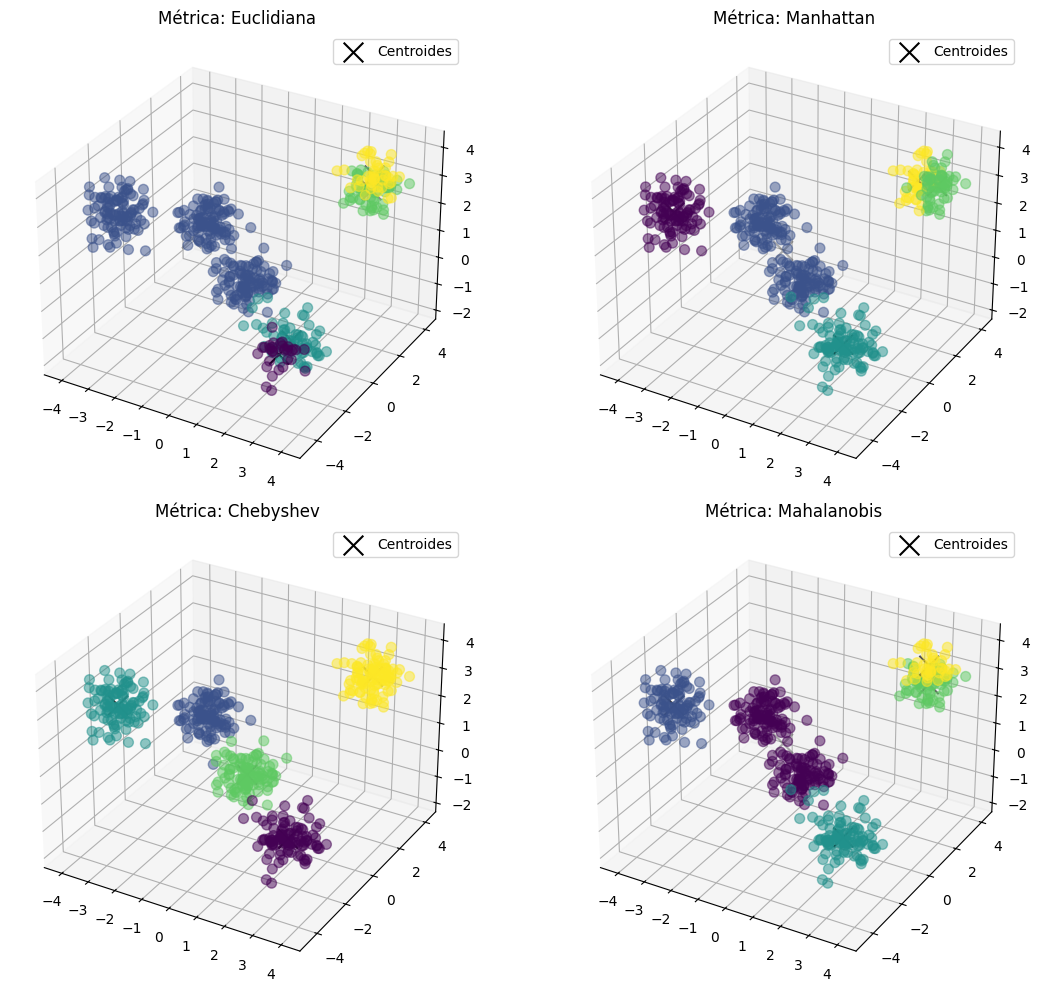

Centroides con métrica euclidiana:
[[ 3.03282978 -3.49574741 -0.02028615]
 [-2.04086586  0.00969758  0.99764896]
 [ 3.04422371 -2.67840194  0.07409187]
 [ 2.9102474   3.16839666  2.71074531]
 [ 3.15058187  2.85247987  3.4477961 ]]

Centroides con métrica manhattan:
[[-3.03285651 -2.95370408  2.98924569]
 [-1.54930658  1.52106957 -0.00927351]
 [ 3.01424499 -2.91982982  0.04600947]
 [ 3.33020816  2.97478168  3.06114625]
 [ 2.59947887  3.10178539  3.00045185]]

Centroides con métrica chebyshev:
[[ 3.07942621e+00 -2.97471961e+00  4.20416642e-02]
 [-3.04897992e+00  2.94553160e+00  1.35689197e-03]
 [-3.03285651e+00 -2.95370408e+00  2.98924569e+00]
 [ 2.20920755e-02  1.82703414e-02 -1.42776097e-02]
 [ 3.01599457e+00  3.02939327e+00  3.03504766e+00]]

Centroides con métrica mahalanobis:
[[-1.54930658  1.52106957 -0.00927351]
 [-3.03285651 -2.95370408  2.98924569]
 [ 3.01424499 -2.91982982  0.04600947]
 [ 2.97754253  3.11894573  2.70585131]
 [ 3.06909499  2.9057256   3.48965214]]



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import mahalanobis

# Función para calcular la distancia según la métrica seleccionada
def calcular_distancia(p1, p2, metrica='euclidiana', A_inv=None):
    if metrica == 'euclidiana':
        return np.linalg.norm(p1 - p2)
    elif metrica == 'manhattan':
        return np.sum(np.abs(p1 - p2))
    elif metrica == 'chebyshev':
        return np.max(np.abs(p1 - p2))
    elif metrica == 'mahalanobis':
        if A_inv is None:
            raise ValueError("Se necesita la matriz inversa de covarianza para Mahalanobis.")
        return mahalanobis(p1, p2, A_inv)
    else:
        raise ValueError("Métrica no soportada")

# Función para asignar puntos a los centroides
def asignar_a_centroides(puntos, centroides, metrica='euclidiana', A_inv=None):
    asignaciones = np.zeros(len(puntos), dtype=int)
    for i, punto in enumerate(puntos):
        distancias = [calcular_distancia(punto, centroide, metrica, A_inv) for centroide in centroides]
        asignaciones[i] = np.argmin(distancias)
    return asignaciones

# Función para ejecutar K-Means con diferentes métricas
def kmeans_experimento(puntos, k, metrica='euclidiana', max_iter=100):
    np.random.seed(42)
    centroides = puntos[np.random.choice(len(puntos), k, replace=False)]
    A_inv = None
    
    if metrica == 'mahalanobis':
        cov_matrix = np.cov(puntos.T)  
        if np.linalg.det(cov_matrix) == 0:
            raise ValueError("La matriz de covarianza no es invertible. Verifica los datos.")
        A_inv = np.linalg.inv(cov_matrix)  
    
    for _ in range(max_iter):
        asignaciones = asignar_a_centroides(puntos, centroides, metrica, A_inv)
        nuevos_centroides = np.array([
            puntos[asignaciones == i].mean(axis=0) if len(puntos[asignaciones == i]) > 0 
            else puntos[np.random.randint(len(puntos))]
            for i in range(k)
        ])
        
        if np.allclose(centroides, nuevos_centroides):
            break
        centroides = nuevos_centroides
    
    return asignaciones, centroides

# Cargar datos 3D
data_3d = pd.read_csv("data_3d.csv", usecols=[0, 1, 2]).values  # Solo las primeras 3 columnas
k = 5
metricas = ['euclidiana', 'manhattan', 'chebyshev', 'mahalanobis']

# Graficar los resultados para cada métrica
fig = plt.figure(figsize=(12, 10))
centroides_resultados = {}

for i, metrica in enumerate(metricas):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    asignaciones, centroides = kmeans_experimento(data_3d, k, metrica)
    
    # Guardamos los centroides en un diccionario
    centroides_resultados[metrica] = centroides  
    
    ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=asignaciones, cmap='viridis', s=50, alpha=0.5)
    ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], c='black', marker='x', s=200, label='Centroides')
    ax.set_title(f"Métrica: {metrica.capitalize()}")
    ax.legend()

plt.tight_layout()
plt.show()

# Imprimir los centroides correctamente
for metrica, centroides in centroides_resultados.items():
    print(f"Centroides con métrica {metrica}:\n{centroides}\n")
